In [1]:
import my_module as mm
nets = []
convs = [8, 16, 32, 64]
fcs = [152, 38, 14]
device = mm.torch.device('cuda' if mm.torch.cuda.is_available() else 'cpu')
print(device)

cuda


In [3]:
count = 0
DIR_PATH = './model/change_layer_disto/'
for i in range(2, -1, -1):
    for j in range(1, 5):
        net = mm.Net(1, 350, 350, 8, convs[:j], fcs[i:])
        count += 1
        PATH = DIR_PATH + "model_" + str(count)
        net.load_state_dict(mm.torch.load(PATH))
        nets.append(net)
print("Done")

Done


In [5]:
categories = [
    "anger",
    "surprise",
    "disgust",
    "fear",
    "neutral",
    "happiness",
    "sadness",
    "contempt"
]

X, y = mm.read_pic(mm.pd.read_csv('data/legend.csv'), categories)
seed = 1234
Xtr, Xva, ytr, yva = mm.train_test_split(X, y, test_size=0.2, random_state=seed)
trainloader, testloader = mm.get_loader(Xtr, Xva, ytr, yva)
print("Done")

Done


In [7]:
training_error = []
testing_error = []
count = 0
for net in nets:
    if mm.torch.cuda.is_available():
        net.cuda()
    training_error.append(1 - mm.accuracy(device, net, trainloader))
    testing_error.append(1 - mm.accuracy(device, net, testloader))
    count += 1
    print("Done for model", count)

Done for model 1
Done for model 2
Done for model 3
Done for model 4
Done for model 5
Done for model 6
Done for model 7
Done for model 8
Done for model 9
Done for model 10
Done for model 11
Done for model 12


[0.9830168005843681, 0.4982651570489408, 0.5033783783783784, 0.497899926953981, 0.5224616508400293, 0.972881665449233, 0.5882030679327976, 0.4966216216216216, 0.5288531775018261, 0.49689554419284154, 0.5875639152666179, 0.5867421475529584]
[0.9817384952520087, 0.5087655222790358, 0.5102264426588751, 0.5116873630387144, 0.5146092037983929, 0.9704163623082542, 0.574872169466764, 0.5073046018991965, 0.5336011687363038, 0.5073046018991965, 0.573046018991965, 0.5726807888970051]


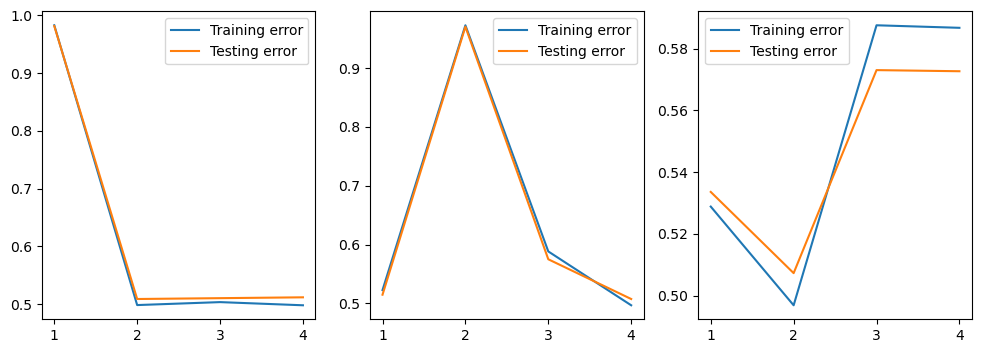

In [8]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(1,3, figsize=(12,4))

print(training_error)
print(testing_error)

M = [1, 2, 3, 4]

for i in range(3):
    l = i * 4
    r = i * 4 + 4
    ax[i].plot(M, training_error[l:r], label="Training error")
    ax[i].plot(M, testing_error[l:r], label="Testing error")
    ax[i].legend()

# The output is wrong, just for debugging